<a href="https://colab.research.google.com/github/aadityadamle/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import random

Dataset source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [2]:
!wget https://raw.githubusercontent.com/aadityadamle/Twitter-Sentiment-Analysis/main/train.csv

--2021-01-20 13:48:15--  https://raw.githubusercontent.com/aadityadamle/Twitter-Sentiment-Analysis/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   2.96M  --.-KB/s    in 0.06s   

2021-01-20 13:48:15 (48.5 MB/s) - ‘train.csv.1’ saved [3103165/3103165]



In [3]:
train = pd.read_csv("/content/train.csv")
print(train.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [4]:
print(train.shape)
train.columns

(31962, 3)


Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
train = train[["tweet","label"]]
train.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


0    29720
1     2242
Name: label, dtype: int64


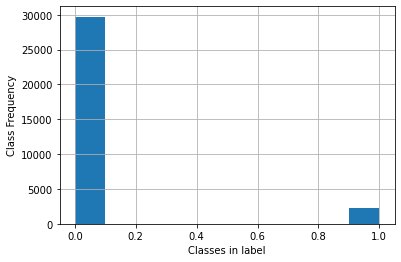

In [6]:
#Observe classes and how many tuples in each class
# 0 - Normal and 1 - Hate Speech
classes = train["label"]
print(classes.value_counts())
classes.hist()
plt.xlabel("Classes in label")
plt.ylabel("Class Frequency")
plt.show()

In [7]:
# Extract tweets from dataframe as series
tweets = train["tweet"]
print(tweets[:10])

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object


In [8]:
#Remove punctuation
tweets = tweets.str.replace(r'[^A-Za-z]', ' ')
print(tweets[:10])

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
5          huge fan fare and big talking before the...
6      user camping tomorrow  user  user  user  use...
7    the next school year is the year for exams    ...
8    we won    love the land     allin  cavs  champ...
9      user  user welcome here    i m   it s so  gr...
Name: tweet, dtype: object


In [9]:
# Set to lowercase
tweets = tweets.str.lower()
print(tweets[:10])

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
5          huge fan fare and big talking before the...
6      user camping tomorrow  user  user  user  use...
7    the next school year is the year for exams    ...
8    we won    love the land     allin  cavs  champ...
9      user  user welcome here    i m   it s so  gr...
Name: tweet, dtype: object


In [10]:
#dowload stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#Setup and remove English stopwords from messages
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
tweets = tweets.apply(lambda x : " ".
                            join(word for word in x.split() 
                            if word not in stop_words))
print(tweets[:10])

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit use cause offer w...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6    user camping tomorrow user user user user user...
7    next school year year exams think school exams...
8    love land allin cavs champions cleveland cleve...
9                                 user user welcome gr
Name: tweet, dtype: object


In [12]:
#Stemming using PorterStemmer 
ps = nltk.PorterStemmer()
tweets = tweets.apply(lambda x: ' '.join(ps.stem(word) 
                            for word in x.split()))
print(tweets[:10])

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit use caus offer whe...
2                                       bihday majesti
3                          model love u take u time ur
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6    user camp tomorrow user user user user user us...
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                  user user welcom gr
Name: tweet, dtype: object


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets)
print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aand', 'aap', 'aapi', 'aaptard', 'aarakshan', 'aarhu', 'aaron', 'aaronorenta', 'aaronrhod', 'aarya', 'aaryn', 'aascf', 'aayat', 'ab', 'aba', 'abandon', 'abantu', 'abasel', 'abba', 'abbey', 'abbi', 'abbibucket', 'abbotabad', 'abbott', 'abbu', 'abbyybel', 'abc', 'abcdiscov', 'abd', 'abdomin', 'abduct', 'abe', 'abella', 'abenom', 'aberdeen', 'aberr', 'aberystwyth', 'abet', 'abg', 'abglp', 'abhi', 'abhishek', 'abi', 'abid', 'abil', 'abitur', 'abject', 'abk', 'abl', 'ableg', 'ableism', 'ablond', 'abndp', 'abo', 'aboion', 'abomin', 'abou', 'aboutlastnight', 'aboutmynextmov', 'abouttim', 'abpoli', 'abraham', 'abrahamhick', 'abrandnewday', 'abrazo', 'abricotin', 'abroad', 'absenc', 'absolut', 'absorb', 'abstract', 'abstracta', 'abstractaist', 'abstractpaint', 'absurd', 'absu

In [14]:
print(X.toarray())
y = train["label"]
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(Train_X,Train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
prediction = classifier.predict(Test_X)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("SVM Accuracy Score is ",accuracy_score(prediction, Test_Y)*100)

SVM Accuracy Score is  95.90789638343136


In [20]:
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [['actual', 'actual'], ['Normal', 'Hate Speech']],
    columns = [['predicted', 'predicted'], ['Normal', 'Hate Speech']])

predicted            
                      Normal Hate Speech
actual Normal           7395          37
       Hate Speech       290         269